In [1]:
import torch
torch.__version__

'1.1.0'

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.version.cuda

'9.0'

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [2]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

In [3]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [4]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [6]:
X = np.random.random((5, 3))
X

array([[0.67278579, 0.37861298, 0.3976611 ],
       [0.7802682 , 0.27945109, 0.77877627],
       [0.20737981, 0.32014617, 0.07208195],
       [0.69111219, 0.85275777, 0.9283954 ],
       [0.20263785, 0.08429096, 0.03177819]])

In [7]:
Y = torch.rand((5,3))
Y

tensor([[0.6890, 0.2390, 0.6722],
        [0.0062, 0.0507, 0.7802],
        [0.3903, 0.1631, 0.7052],
        [0.6519, 0.0429, 0.4392],
        [0.2268, 0.4071, 0.8829]])

In [8]:
X.shape
Y.shape

torch.Size([5, 3])

In [9]:
X.T @ X # Multiplication

array([[1.62316371, 1.1455959 , 1.53820827],
       [1.1455959 , 1.05823505, 1.1856413 ],
       [1.53820827, 1.1856413 , 1.63275052]])

In [13]:
Y.t() @ Y # Multiplication

tensor([[1.1035, 0.3489, 1.2298],
        [0.3489, 0.2539, 0.6935],
        [1.2298, 0.6935, 2.5302]])

In [14]:
inv(X.T @ X) # Inverse

array([[ 5.88669225, -0.85368395, -4.92591838],
       [-0.85368395,  5.19306052, -2.96675043],
       [-4.92591838, -2.96675043,  7.40749436]])

In [15]:
torch.inverse(Y.t() @ Y)  # Inverse

tensor([[ 1.9859, -0.3695, -0.8640],
        [-0.3695, 15.7435, -4.1353],
        [-0.8640, -4.1353,  1.9486]])

In [17]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [18]:
A  # original tensor is unchanged

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [19]:
A.add_(1) # tensor gets overwritten

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [20]:
A

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [21]:
A[0, 0]

tensor(2.)

In [22]:
A[0]

tensor([2., 1., 1.])

In [23]:
A[0:2] # Rows o and 1

tensor([[2., 1., 1.],
        [1., 2., 1.]])

In [24]:
A[:, 1:3] # Columns 1 and 2

tensor([[1., 1.],
        [2., 1.],
        [1., 2.]])

In [26]:
A = torch.eye(3)

In [27]:
B = A.numpy()
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [28]:
A.add_(.5)
A

tensor([[1.5000, 0.5000, 0.5000],
        [0.5000, 1.5000, 0.5000],
        [0.5000, 0.5000, 1.5000]])

In [29]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

In [30]:
# How do I use the GPU?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# You can move data to the GPU by doing .to(device)
# data = torch.eye(3)
# data.to(device)

In [31]:
from torch import autograd

In [32]:
x = torch.tensor(2.)
x

tensor(2.)

In [36]:
#Prior to v0.4 PyTorch used the class Variable to record gradients. You had to wrap Tensors in Variables. Variables behaved exactly like Tensors.

#With v0.4 Tensor can record gradients directly if you tell it do do so, e.g. torch.ones(3, requires_grad=True). There is no need for Variable anymore. Many tutorials still use Variable, be aware!

#Ref:

#https://pytorch.org/docs/stable/autograd.html
#https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
#You rarely use torch.autograd directly. Pretty much everything is part or torch.Tensor now. Simply add requires_grad=True to the tensors you want to calculate the gradients for. nn.Module track gradients automatically.


x = torch.tensor(2., requires_grad=True)
x

tensor(2., requires_grad=True)

In [37]:
print(x.requires_grad)

True


In [38]:
print(x.grad)

None


In [39]:
y = x ** 2

print("Grad of x:", x.grad)

Grad of x: None


In [42]:
X = torch.eye(3, requires_grad=True)
X

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)

In [45]:
y = x ** 2
y.backward()

print("Grad of x:", x.grad)

Grad of x: tensor(4.)


In [47]:
lin = nn.Linear(2, 1, bias=True)
lin.weight

Parameter containing:
tensor([[-0.1546,  0.6619]], requires_grad=True)

In [48]:
type(lin.weight)

torch.nn.parameter.Parameter

In [49]:
isinstance(lin.weight, torch.FloatTensor)

True

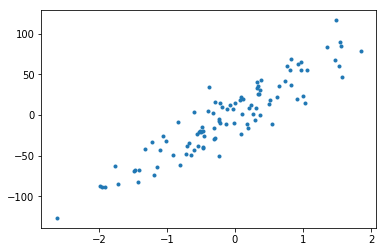

In [3]:
# Linear Regression with PyTorch

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [4]:
X.shape  # IV

(100, 1)

In [5]:
y.shape  # DV

(100,)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [8]:
from torch import nn, optim
class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [9]:
# specify the model, loss and optimizer (SGD, Adam) followed by training in any machine learning model
model = LinReg(n_features)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

tensor(2068.3984, grad_fn=<MseLossBackward>)


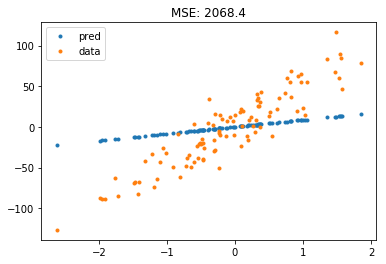

In [10]:
# Train step, just one epoch, can be put in a for loop
# Forward Propagation
model.train()  # setting the model to train mode
optimizer.zero_grad() # initializing it to zero gradient

y_ = model.forward(X)  # y_ is the predicted values, like y_hat
loss = loss_fn(y_, y)  # basically nn.MSELoss(y_,y)
print(loss)

# Back Propagation

loss.backward()
optimizer.step()  # Updation of Linear Regression beta parameters

# Eval
model.eval()  # <-- here
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();